In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
amazon = pd.read_excel('AmazonTextract.xlsx', names = ['Text', 'Confidence_score'], engine='openpyxl')
azure = pd.read_excel('Azureoutput.xlsx', names = ['Text', 'Confidence_score'], engine='openpyxl')
azure['Confidence_score'] = azure['Confidence_score']*100

In [9]:
amazon.head()

,Text,Confidence_score
0,UR No:,59.240063
1,1234,93.278328
2,S,80.190369
3,6,24.406532
4,Family,99.821190


In [10]:
azure.head()

,Text,Confidence_score
0,1.,71.7
1,WRITE,76.2
2,PATIENT,92.7
3,DETAILS,93.7
4,OR,94.1


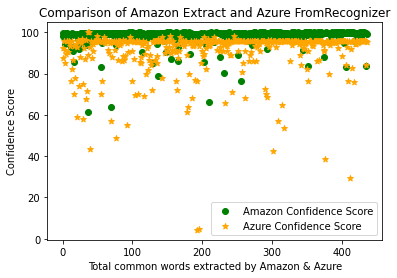

In [17]:
amazon = amazon.groupby(['Text'], as_index = False).mean()
azure = azure.groupby(['Text'], as_index = False).mean()
combinedDF = amazon.merge(azure, on = ['Text'], how = 'inner')

x2 = x1 = range((combinedDF.shape)[0])
y1 = combinedDF.Confidence_score_x
plt.scatter(x1, y1, label = "Amazon Confidence Score", c='green' , marker = "o")
y2 = combinedDF.Confidence_score_y
plt.scatter(x2, y2, label = "Azure Confidence Score", c='orange', marker = "*")
plt.xlabel('Total common words extracted by Amazon & Azure')
plt.ylabel('Confidence Score')
plt.title('Comparison of Amazon Extract and Azure FromRecognizer')
plt.legend()
plt.show()